In [1]:
import matplotlib.pyplot as plt
import subprocess
import numpy as np

%matplotlib inline

In [9]:
output = subprocess.check_output("grep \'^ 200\' ../experiments/eigenvalues/resnet_*/log", shell=True).decode("utf-8") 
output_log = np.array([[float(i) for i in o.split()[1:]] for o in output.split('\n')[:-1]])

output_ordering = []
for o in output.split('\n')[:-1]:
    output_ordering.append(int(o.split('/')[3].split('_')[1]))

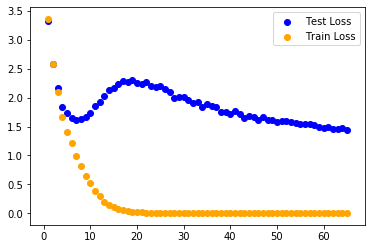

In [10]:
plt.scatter(output_ordering, output_log[:,4], 
         label = 'Test Loss', color = 'blue')
plt.scatter(output_ordering, output_log[:,2], 
         label = 'Train Loss', color = 'orange')
plt.legend()

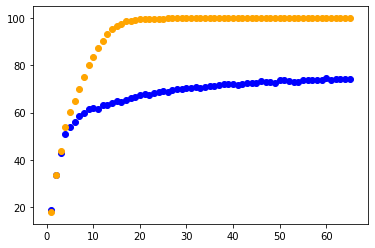

In [11]:
plt.scatter(output_ordering, output_log[:,5], 
         label = 'Test Loss', color = 'blue')
plt.scatter(output_ordering, output_log[:,3], 
         label = 'Train Loss', color = 'orange')

In [17]:
all_evals = []
xaxis = []
for i in range(1, 65):
    try:
        #print(i)
        current = np.load('../experiments/eigenvalues/hessian_eigs/width_'+str(i)+'.npz')
        all_evals.append(current['pos_evals'])
        xaxis.append(i)
    except:
        print(i, 'failed. please re-run')
        
fisher_evals = []
fisher_xaxis = []
for i in range(1, 65):
    try:
        #print(i)
        current = np.load('../experiments/eigenvalues/fisher_eigs/width_'+str(i)+'.npz')
        fisher_evals.append(current['pos_evals'])
        fisher_xaxis.append(i)
    except:
        print(i, 'failed. please re-run')

In [18]:
def eff_dim(vec, s=1):
    return np.sum(vec / (vec + s))

In [19]:
hessian_eff_dim_list = np.array([eff_dim(v[v!=1.], s = 1.) for v in all_evals])
fisher_eff_dim_list = np.array([eff_dim(v[v!=1.], s=1e-2) for v in fisher_evals])

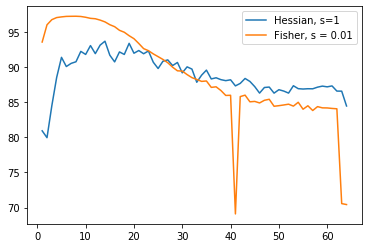

In [20]:
plt.plot(xaxis, hessian_eff_dim_list, label = 'Hessian, s=1')
plt.plot(fisher_xaxis, fisher_eff_dim_list, label = 'Fisher, s = 0.01')
plt.legend()

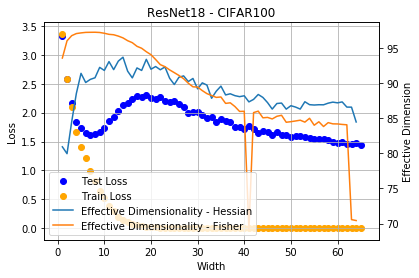

In [21]:
fig, ax = plt.subplots()
ax.scatter(output_ordering, output_log[:,4], 
         label = 'Test Loss', color = 'blue')
ax.scatter(output_ordering, output_log[:,2], 
         label = 'Train Loss', color = 'orange')

# plt.plot(range(16,41), output_gt16_log[:,4], color = 'blue')
# plt.plot(range(16,41), output_gt16_log[:,2], color = 'orange')

#ax.legend()
ax.set_xlabel('Width')
ax.set_ylabel('Loss')

ax2 = ax.twinx()
ax2.plot(xaxis, hessian_eff_dim_list, label = 'Effective Dimensionality - Hessian')
ax2.plot(fisher_xaxis, fisher_eff_dim_list, label = 'Effective Dimensionality - Fisher')
#ax2.legend(loc='upper right')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)
ax2.set_ylabel('Effective Dimension')

plt.title('ResNet18 - CIFAR100')
ax.grid()
#plt.savefig('../saved-experiments/dnn_double_descent.pdf', bbox_inches='tight')

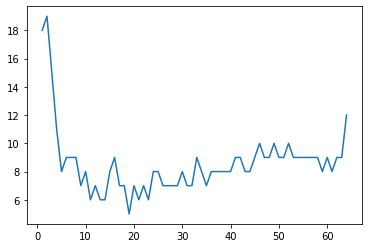

In [22]:
plt.plot(xaxis, [np.sum(x==1.) for x in all_evals])

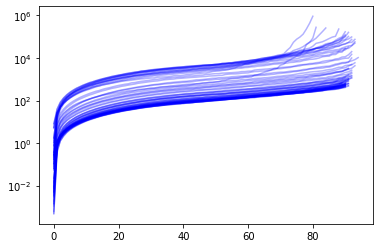

In [23]:
[plt.semilogy(x[x!=1.], color='blue', alpha = 0.3) for x in all_evals];

[[<matplotlib.lines.Line2D at 0x7fd3f54826d0>],

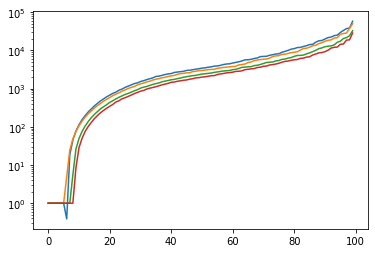

In [24]:
[plt.semilogy(all_evals[i]) for i in range(12, 16)]

In [25]:
import pickle

In [ ]:
with open('../saved-experiments/')